In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [2]:
global_country = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

### Exploring the data

In [3]:
global_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
global_country.shape

(577462, 4)

In [5]:
sort_by_temp_desc = global_country.sort_values('AverageTemperature', ascending=False)
sort_by_temp_desc

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait
284707,2000-07-01,38.705,0.467,Kuwait
284827,2010-07-01,38.495,0.498,Kuwait
284684,1998-08-01,38.436,0.353,Kuwait
284708,2000-08-01,38.315,0.593,Kuwait
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


### Visualising the upward trend

In [6]:
global_temp = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

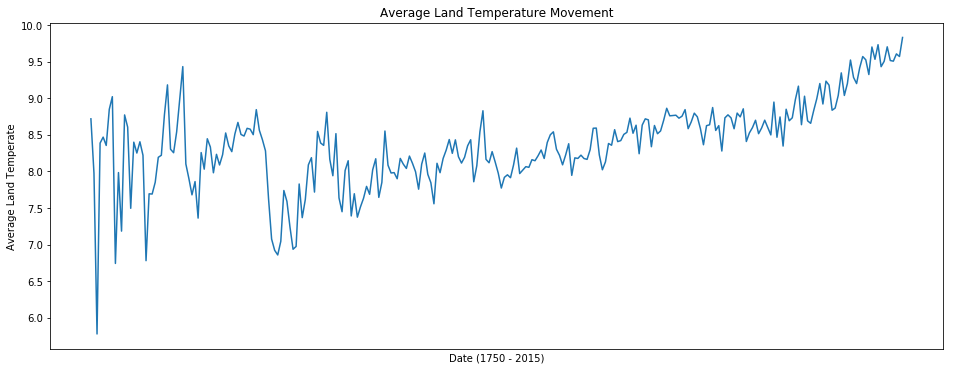

In [7]:
global_temp = global_temp[['dt', 'LandAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt'] = pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt'] = global_temp['dt'].apply(lambda x:x[6:])
global_temp = global_temp.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = global_temp['dt'],
    y = global_temp['LandAverageTemperature'])
ax.set_title('Average Land Temperature Movement')
ax.set_ylabel('Average Land Temperate')
ax.set_xlabel('Date (1750 - 2015)')
ax.axes.get_xaxis().set_ticks([])
ax

### The above visualisation shows a clear upward trend in the average land temperature over the past years

Please be mindful that the data in the early years (1750) is likely to be a little less accurate due to the limits of the record keeping at the time

### Now I'll use machine learning to predict the future average land temperature

In [8]:
global_temp

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [9]:
# Preparing the data for machine learning
X = global_temp.iloc[:, global_temp.columns != 'LandAverageTemperature'].values
y = global_temp.iloc[:, global_temp.columns == 'LandAverageTemperature'].values

In [10]:
y

array([[8.71936364],
       [7.97614286],
       [5.77983333],
       [8.38808333],
       [8.46933333],
       [8.35558333],
       [8.84958333],
       [9.022     ],
       [6.74358333],
       [7.98508333],
       [7.18516667],
       [8.7725    ],
       [8.6065    ],
       [7.49675   ],
       [8.40033333],
       [8.25191667],
       [8.40566667],
       [8.2215    ],
       [6.78133333],
       [7.69458333],
       [7.69191667],
       [7.85316667],
       [8.1935    ],
       [8.2215    ],
       [8.77216667],
       [9.18308333],
       [8.304     ],
       [8.25625   ],
       [8.54225   ],
       [8.98325   ],
       [9.43291667],
       [8.10258333],
       [7.90125   ],
       [7.68083333],
       [7.862     ],
       [7.363     ],
       [8.25816667],
       [8.03183333],
       [8.44716667],
       [8.33416667],
       [7.98233333],
       [8.23425   ],
       [8.089     ],
       [8.22916667],
       [8.526     ],
       [8.35033333],
       [8.271     ],
       [8.510

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train

array([['1857'],
       ['1930'],
       ['1997'],
       ['1794'],
       ['1847'],
       ['1824'],
       ['1971'],
       ['1940'],
       ['1833'],
       ['2015'],
       ['1868'],
       ['1840'],
       ['1944'],
       ['1853'],
       ['1768'],
       ['1949'],
       ['1983'],
       ['1839'],
       ['1821'],
       ['1916'],
       ['2010'],
       ['2005'],
       ['1889'],
       ['1783'],
       ['1856'],
       ['1905'],
       ['1872'],
       ['2007'],
       ['1771'],
       ['1977'],
       ['1859'],
       ['1766'],
       ['1894'],
       ['1825'],
       ['1861'],
       ['1932'],
       ['1875'],
       ['1941'],
       ['1754'],
       ['1962'],
       ['1811'],
       ['1817'],
       ['1802'],
       ['1816'],
       ['1776'],
       ['1938'],
       ['1908'],
       ['1963'],
       ['1990'],
       ['1790'],
       ['1763'],
       ['1895'],
       ['1907'],
       ['1753'],
       ['1874'],
       ['1774'],
       ['1780'],
       ['1991'],
       ['1876'

In [13]:
# Fitting a linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [24]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

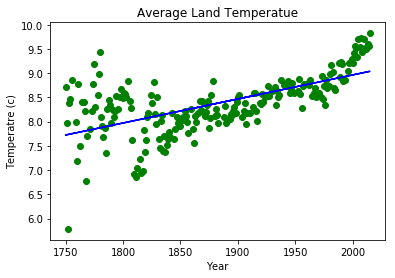

In [25]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Land Temperature (Training Set)')
plt.xlabel('Year')
plt.ylabel('Temperatre (c)')
plt.show()

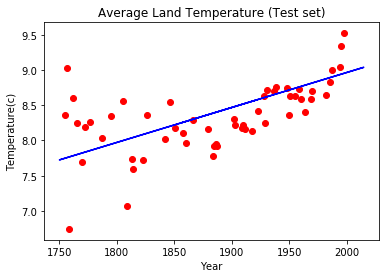

In [40]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Land Temperature (Test set)')
plt.xlabel('Year')
plt.ylabel('Temperature(c)')
plt.show()

In [63]:
# Building the predictor
X_predict = [2050] # Enter the year that you require the temperature for
X_predict = np.array(X_predict).reshape(1, -1)#
y_predict = regressor.predict(X_predict)

# Outputting the predicted temperature of the year above
y_predict

array([[9.21229253]])

The average land temperature is likely to increase to 9.21 degrees celcius by 2050. That is an increase of circa 0.2 degrees between now and then and this is only taking land temperature into account, not sea temperature, which is hotter and historically warms faster.